# Machine Learning - Assignment 1 (PS3)

The assignment is submitted by:
<span style="color:blue"> <b> Vidushi Bhatia, 2024AC05012</b></span>.

As per the given criteria of the `last 4 digits of your BITS ID mod 10 + 1`, I have worked on **Problem Statement 3**.

<hr>

#### Table of Contents

1. Problem Overview
2. Import Libraries
3. Data Visualization & Exploration
4. Data Preprocessing
5. Model Building <br>
       5.1 Split train and test <br>
       5.2 Choose classifier model <br>
       5.3 Hyperparameter Tuning <br>
7. Performance Evaluation
8. Conclusion

<hr>

### 1. Problem Overview <a class="anchor" id="overview"></a>

The given problem is about assessing the **potability (drinkability)** of `3276` water samples using various features. The dataset contains several independent variables (such as pH, hardness, solids, etc.) that describe the quality of water, and a target label indicating whether the water is **potable (1) or not potable (0)**.

As the target variable is **binary**, the goal is to build and evaluate **classification models** that can accurately predict whether a given water sample is safe for human consumption based on the given features. 

### 2. Import Libraries & Dataset


In [1]:
# for database manipulations
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# for evaluation
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# removing warnings from outputs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read given input data
print("\n********************** Reading Input Data **********************\n")
input_data = pd.read_csv('water_potability.csv')
print(f"Shape of the given dataset is: {input_data.shape}\n")
input_data.describe()


********************** Reading Input Data **********************

Shape of the given dataset is: (3276, 10)



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
# convert all col names to lower for consistency

input_data.columns = input_data.columns.str.lower()



#### 📊 Initial Observations:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 <code>ph</code>, <code>sulfate</code>, and <code>trihalomethanes</code> appear to have missing values — their <b>count</b> is less than the total number of rows.

🔹 <code>solids</code> and <code>trihalomethanes</code> have a high difference between the <b>75th percentile</b> and the <b>max</b>, suggesting potential <i>right skewness</i> or <i>outliers</i>.

🔹 <code>turbidity</code> shows a narrow range — its <b>min</b> and <b>max</b> values are close, indicating low spread compared to other features. <br>

</div>


<br>
<hr>
<br>

### 2. Data Visualization and Exploration

In this section, we understand:
- target class distribution
- feature distribution
- pairplot analysis
- correlation analysis

In [4]:
# sanity check: manual checks for some rows.
print("\n********************** Top 10 Rows **********************\n")

input_data.head(10)


********************** Top 10 Rows **********************



,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0



********************** Target Class Distribution **********************

potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64 



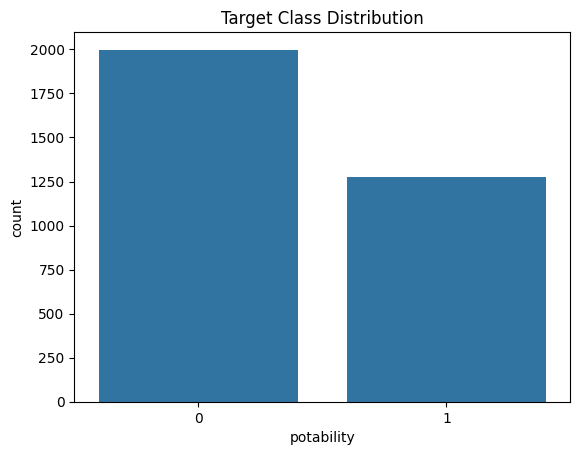

In [5]:
# class imbalance
print("\n********************** Target Class Distribution **********************\n")

print(f"{input_data.potability.value_counts(normalize=True)} \n")


sns.countplot(x='potability', data=input_data)
plt.title('Target Class Distribution')
plt.show()


********************** Feature Distribution **********************



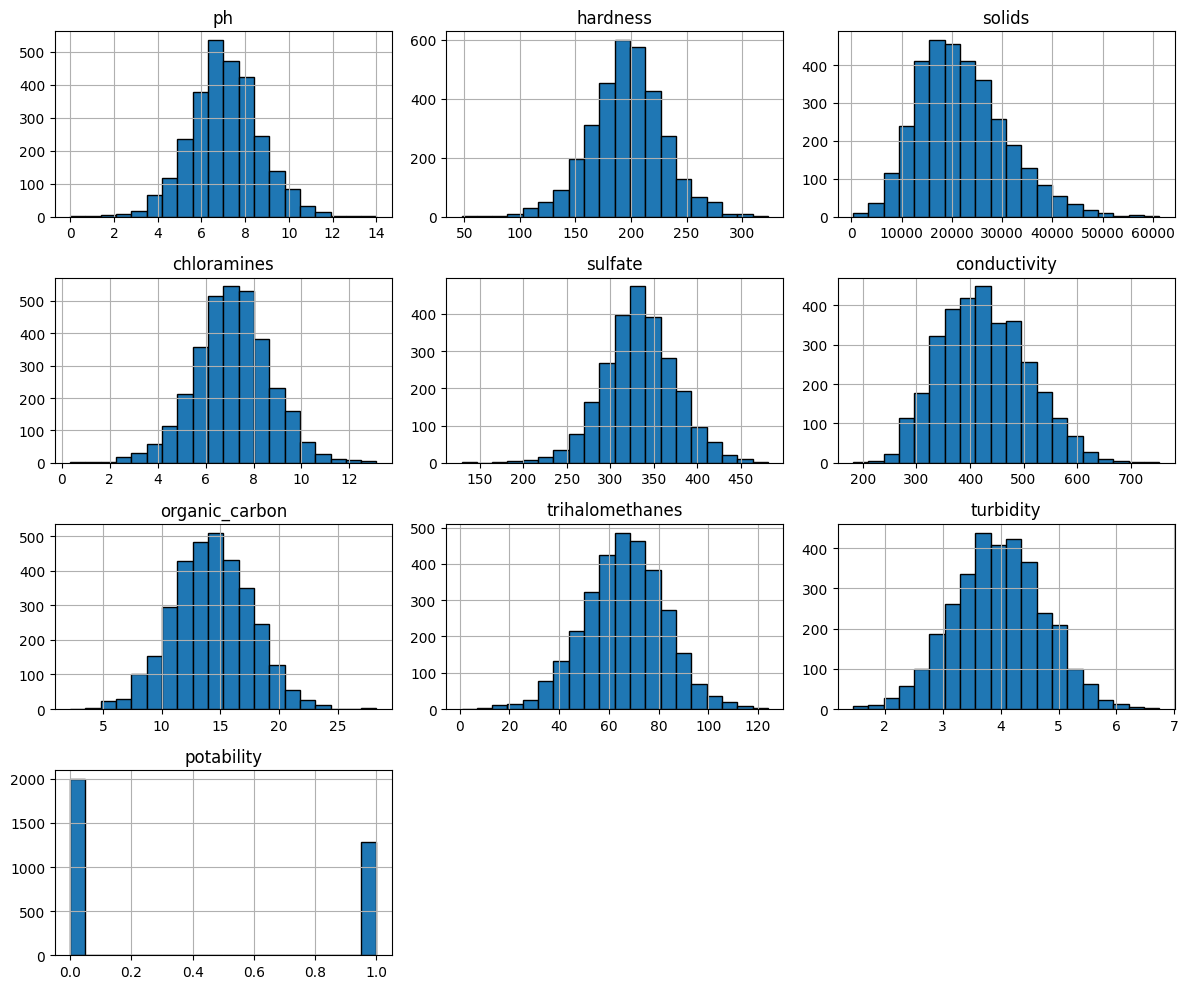

In [6]:
# check the spread  of each independent variable
print("\n********************** Feature Distribution **********************\n")

input_data.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


********************** Independent Variables vs Target **********************



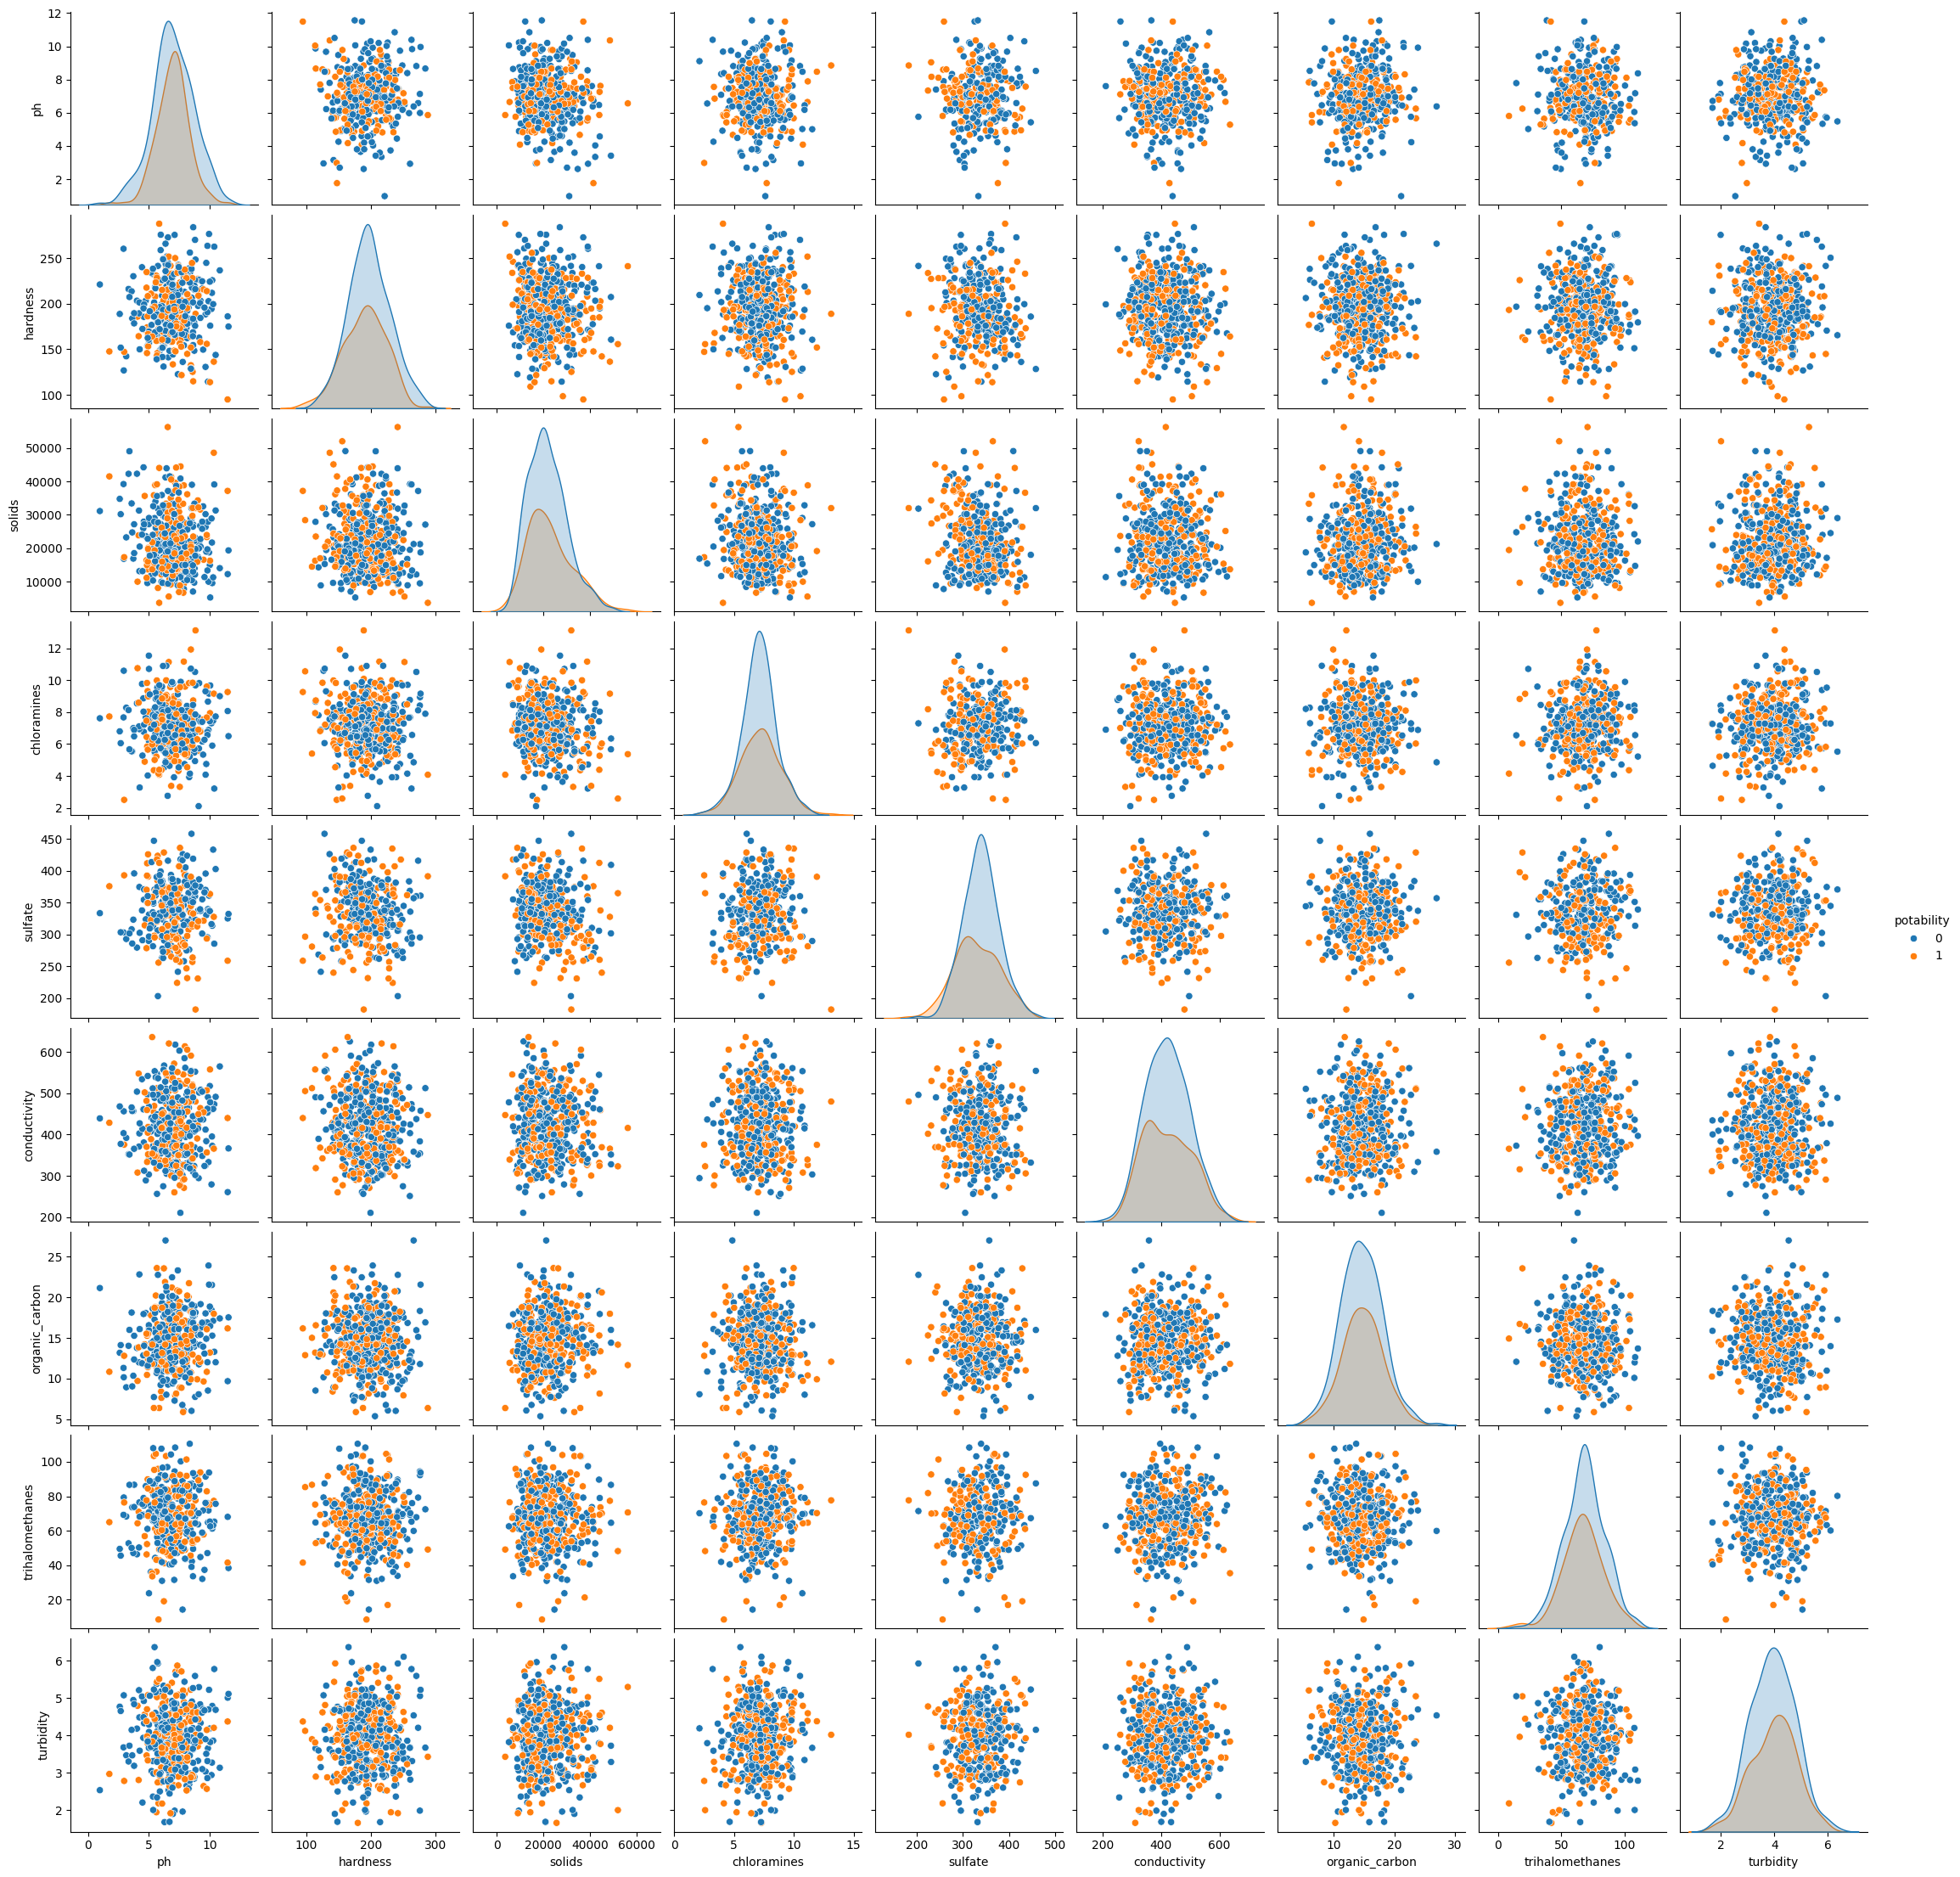

In [7]:
# How do each feature relate to the target variable

print("\n********************** Independent Variables vs Target **********************\n")

sns.pairplot(input_data.sample(500), hue='potability', vars=input_data.columns[:-1])


********************** Correlation Analysis: **********************



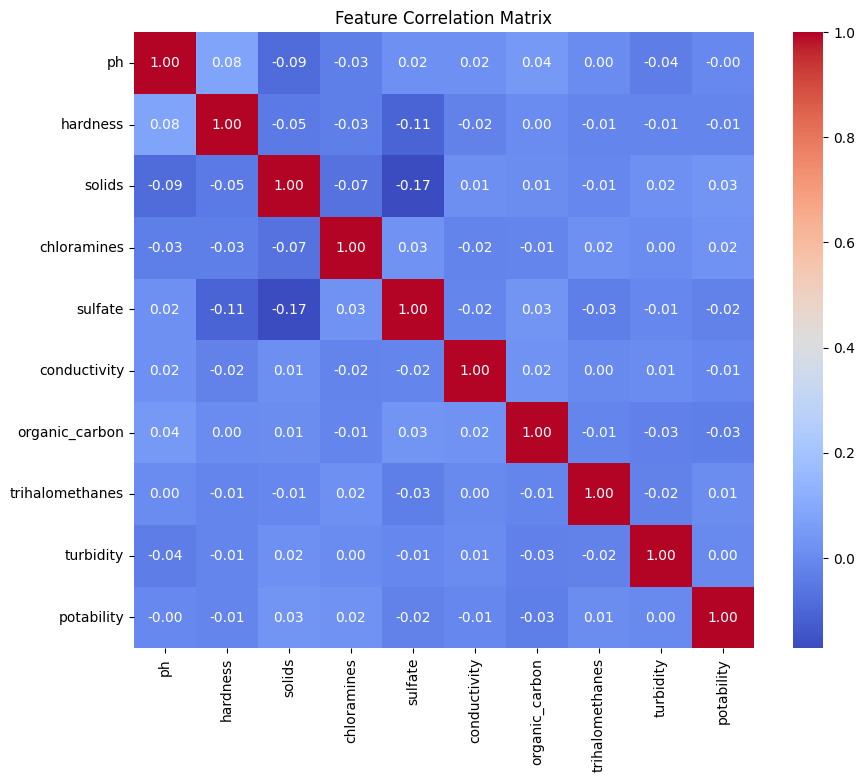

In [8]:
# Are features correlated?

print("\n********************** Correlation Analysis: **********************\n")

corr = input_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

#### 📊 Observations:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 Histograms reveal various feature distributions — some are <i>normal</i>, others are <i>skewed</i>; the <b>pairplot</b> indicates potential <b>class separation</b>.<br>

🔹 Strong <b>correlations</b> between some features suggest <i>multicollinearity</i>, which may lead to redundancy.<br>

🔹 In such cases, we might <b>drop or combine</b> highly correlated variables to reduce dimensionality without significant information loss — this will inform future <b>feature selection</b> or <b>dimensionality reduction</b> steps.

</div>

<br>
<hr>
<br>

### 3. Data Pre-processing

The following pre-processing steps are applied in this section:
- Missing value detection and imputation  
- Outlier detection and handling if needed  
- Feature scaling (standardization/normalization)
- more transformations???


In [9]:
num_cols = input_data.columns[:-1]

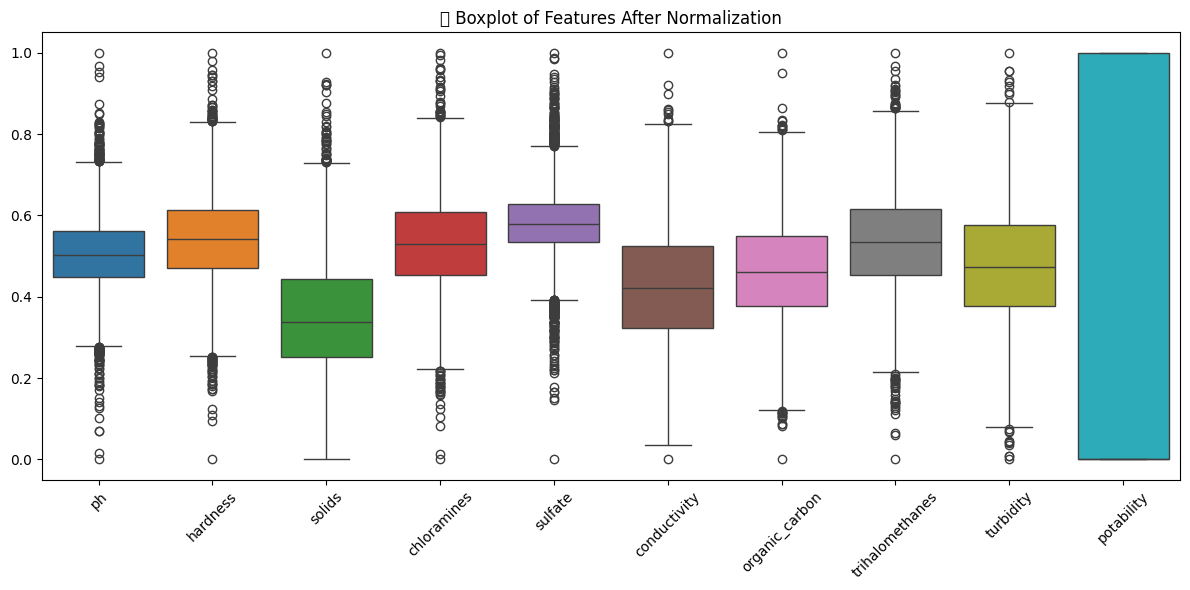

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=input_data[num_cols])
plt.title("📦 Boxplot of Features After Normalization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# - Missing value detection and imputation  
print("\n********************** Missing Values in Data: **********************\n")
print(input_data.isnull().sum())


# Impute with median for numeric features
print("\n********************** Post Imputation: **********************\n")


imputer = SimpleImputer(strategy='median')
input_data[num_cols] = imputer.fit_transform(input_data[num_cols])
print(input_data.isnull().sum())


********************** Missing Values in Data: **********************

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

********************** Post Imputation: **********************

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64


In [12]:
def detect_outliers_sd(df, threshold=3):
    """
    Detects outliers in numerical features using the mean ± threshold * standard deviation.
    Returns a summary and a cleaned DataFrame.
    """
    numeric_cols = df.select_dtypes(include='number').columns
    cleaned_df = df.copy()
    
    print("\n📘 Outlier Detection using Mean ± {}×SD:\n".format(threshold))
    
    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        lower = mean - threshold * std
        upper = mean + threshold * std

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"🔹 {col}: {len(outliers)} outliers")

        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    
    return cleaned_df


In [13]:
def detect_outliers_iqr(df, iqr_multiplier=1.5):
    """
    Detects outliers in numerical features using the IQR method.
    Returns a summary and a cleaned DataFrame.
    """
    numeric_cols = df.select_dtypes(include='number').columns
    cleaned_df = df.copy()

    print("\n📘 Outlier Detection using IQR Method:\n")

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - iqr_multiplier * IQR
        upper = Q3 + iqr_multiplier * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"🔹 {col}: {len(outliers)} outliers")

        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]

    return cleaned_df


ERROR! Session/line number was not unique in database. History logging moved to new session 4


In [14]:
# Using SD Method
cleaned_sd = detect_outliers_sd(input_data, threshold=3)

# Using IQR Method
cleaned_iqr = detect_outliers_iqr(input_data, iqr_multiplier=1.5)



📘 Outlier Detection using Mean ± 3×SD:

🔹 ph: 28 outliers
🔹 hardness: 18 outliers
🔹 solids: 20 outliers
🔹 chloramines: 20 outliers
🔹 sulfate: 34 outliers
🔹 conductivity: 7 outliers
🔹 organic_carbon: 4 outliers
🔹 trihalomethanes: 18 outliers
🔹 turbidity: 8 outliers
🔹 potability: 0 outliers

📘 Outlier Detection using IQR Method:

🔹 ph: 142 outliers
🔹 hardness: 83 outliers
🔹 solids: 47 outliers
🔹 chloramines: 61 outliers
🔹 sulfate: 264 outliers
🔹 conductivity: 11 outliers
🔹 organic_carbon: 25 outliers
🔹 trihalomethanes: 54 outliers
🔹 turbidity: 19 outliers
🔹 potability: 0 outliers


In [15]:
# - Feature scaling (standardization/normalization) with justification 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns
num_cols = input_data.select_dtypes(include='number').columns

# Initialize the scaler
scaler = StandardScaler()
# scaler = MinMaxScaler()  # Uncomment to use normalization instead

# Apply scaling
input_data[num_cols] = scaler.fit_transform(input_data[num_cols])

# Print summary
print("✅ Feature scaling applied to the following numerical columns:")
print(list(num_cols))
print(f"\n📏 Scaler used: {'StandardScaler (Z-score standardization)'}")
# print(f"\n📏 Scaler used: {'MinMaxScaler (0-1 normalization)'}")

✅ Feature scaling applied to the following numerical columns:
['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']

📏 Scaler used: StandardScaler (Z-score standardization)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
num_cols = input_data.select_dtypes(include='number').columns

# Initialize scaler
scaler = MinMaxScaler()

# Apply normalization
input_data[num_cols] = scaler.fit_transform(input_data[num_cols])

# Print confirmation
print("✅ Normalization (Min-Max Scaling) applied to:")
print(list(num_cols))

✅ Normalization (Min-Max Scaling) applied to:
['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']


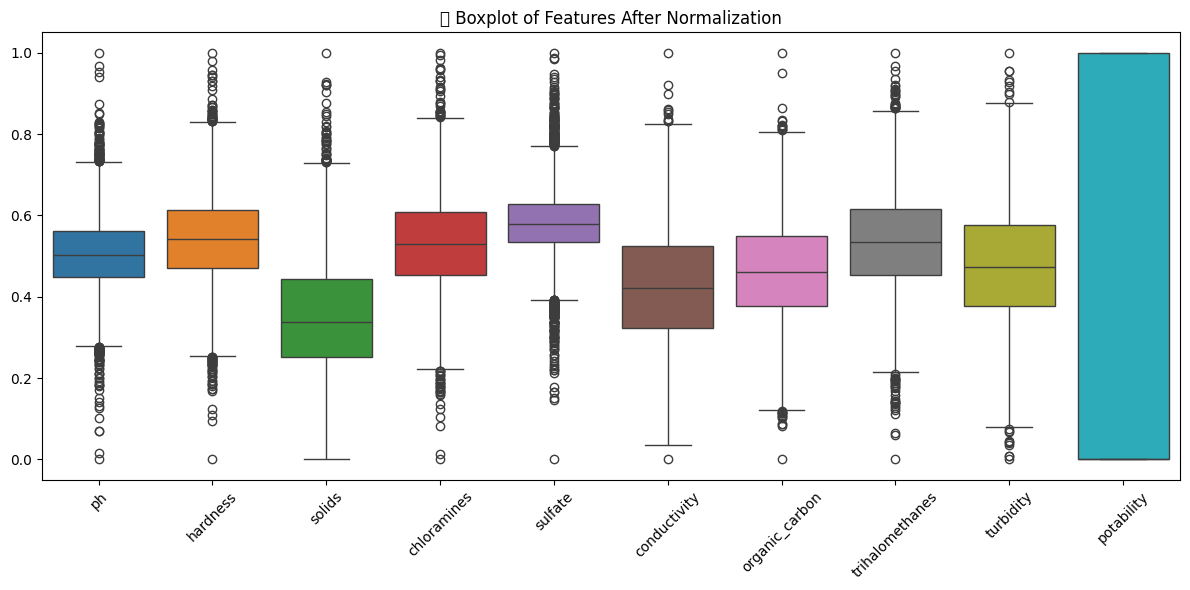

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=input_data[num_cols])
plt.title("📦 Boxplot of Features After Normalization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔎 Outlier Detection Summary

- **SD Method** identifies outliers as values lying beyond ±3 standard deviations from the mean.
- **IQR Method** identifies outliers as values outside 1.5×IQR from Q1 and Q3.
- Both methods are applied to all numeric features.

### ⚖️ Feature Scaling (Standardization vs Normalization)

- **Standardization (Z-score scaling)** is used when:
  - The data follows a roughly **normal distribution**
  - You're using models that assume standardized features (e.g., **Logistic Regression**, **SVM**, **KNN**, **PCA**)

- **Normalization (Min-Max scaling)** is used when:
  - Data does **not follow a normal distribution**
  - You want to scale features to a fixed range (0 to 1), especially for **neural networks**

### 📏 Normalization (Min-Max Scaling)

We apply **Min-Max normalization** when:

- Features are on different scales and not normally distributed
- Models like **neural networks** require features to be in a uniform [0, 1] range
- You want to preserve the shape of the original distribution (unlike Z-score standardization)

In this step, we normalize all numerical columns to the [0, 1] range.


📌 In this notebook, we’ll use **StandardScaler** for all numerical features since many ML algorithms assume features are centered and scaled.


<br>
<hr>
<br>

### 4. Model Building [11M]

In this section, ...


#### 4.1 Split Train Test

**Split the dataset into training and test sets. Answer without justification will not be awarded marks.** [1]
- Train = 80 % Test = 20% 
- Also, try to split the dataset with different ratios of your choice.

In [ ]:
# split target and independent variables
print("\n********************** Outlier Detection: **********************\n")

X = input_data.drop('potability', axis=1)
y = input_data['potability']

In [ ]:
# 80-20 split
print("\n********************** Stratified Sampling: **********************\n")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("train distribution: ", y_train.value_counts(normalize = True))
print("\ntest distribution: ", y_test.value_counts(normalize = True))


##### 📊 Observations:
- Histograms reveal feature distribution (normal, skewed); pairplot shows potential class separation.
- High correlations between features (multicollinearity) can lead to redundancy. In such cases, we might drop or combine highly correlated variables to reduce dimensionality without losing information. This will guide feature selection or dimensionality reduction steps later.

Stratified split ensures both train/test sets maintain the same class distribution ratio, preventing bias.

You can optionally test other ratios like 70/30 or 90/10 to compare stability of results.

<br>
<hr>
<br>


#### 4.2 Predictive Models

**Implement predictive models/classifiers using the following classification approaches**:    [8]
- Logistic Regression
- Decision tree
- K-Nearest Neighbour
- Ensemble Methods (any one of your choice)



In [ ]:
# Define models and their parameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [None, 5, 10, 20]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3,5,7,9]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50,100,200], 'max_depth': [None,10,20]}
    }
}

best_models = {}
for name, mp in models.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5,
                        scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"{name}: Best params: {grid.best_params_}, CV AUC: {grid.best_score_:.3f}")


#### 📊 Observations:
Justification:

Logistic Regression: C controls regularization strength—tuning prevents overfitting/underfitting.

Decision Tree: max_depth limits complexity—balances bias/variance.

KNN: n_neighbors affects smoothing.

Random Forest: Ensemble reduces overfitting; tuning n_estimators and max_depth controls strength and overfitting.
<br>
<hr>
<br>


#### 4.3 Hyperparameter Tuning

**Tune hyperparameters** (e.g., number of trees, maximum depth) using cross-validation. For each of the above models. Justify your answer. [2]


#### 📊 Observations:
- Histograms reveal feature distribution (normal, skewed); pairplot shows potential class separation.
- High correlations between features (multicollinearity) can lead to redundancy. In such cases, we might drop or combine highly correlated variables to reduce dimensionality without losing information. This will guide feature selection or dimensionality reduction steps later.

Stratified split ensures both train/test sets maintain the same class distribution ratio, preventing bias.

You can optionally test other ratios like 70/30 or 90/10 to compare stability of results.

<br>
<hr>
<br>


#### 5. Performance Evaluation [6M]

- Compare the performances of each model/classifier considering the given dataset using different evaluation measures such as Precision, Recall, F1-Score, AUC-ROC. Show the comparison chart in Python notebook [4]

In [ ]:
results = []
for name, grid in best_models.items():
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:,1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    results.append({
        'Model': name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'AUC': auc
    })

results_df = pd.DataFrame(results)
results_df


- Identify the model, which you think is the best amongst all the models that have been trained. Also, explain why you think this is the best model. Answer this question in the notebook itself.  [2]


In [ ]:
# Plotting comparison
results_df.set_index('Model')[['Precision','Recall','F1-Score','AUC']].plot(
    kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


**Best Model**: [Insert chosen model name]


Justification:

Compare metrics: precision/recall/F1/AUC.

Example: If RandomForest shows highest AUC and balanced precision-recall, it's preferred for its ensemble robustness and generalization performance.

